In [1]:
%matplotlib notebook 
#%matplotlib inline
#from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

#Punto 1

In [2]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        self.t = t

        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    def CheckWallLimits(self, limits, dim = 2):
        #tchoque=[]
        for i in range(dim):
            if self.r[i] + self.radius > limits [i] and self.v[i] >0:
                self.v[i] = -self.v[i]*(0.9)              #Se multiplica por 0.9, el factor de restitución, de tal manera que cada vez que choque las paredes su velocidad disminuya.
            if self.r[i] - self.radius < -limits[i] and self.v[i]<0:
                self.v[i] = -self.v[i]*(0.9)
          #tchoque.append(self.t[i])
      #print(tchoque)
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector

    def GetRPositionVector(self):
        return self.RrVector
    
    def GetRVelocityVector(self):
        return self.RvVector

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.RvVector = np.array([self.vVector[0]]) # Vector de velocidad reducido        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [3]:
# Discretization
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)


In [4]:
def GetParticles(NParticles,Limit,Position,Velocity,Dim=2,dt=0.01):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        #Se ponen las condiciones iniciales de posición, velocidad y aceleración

        x0 = np.array(Position)
        v0 = np.array(Velocity)
        a0 = np.array([0, -9.81])
        
        p = Particle(x0,v0,a0,t,1.,1.,i) #Se modela como partículas de masa m=1 y radio r=1
        
        Particles_.append(p)
        
    return Particles_

In [5]:
Limits = np.array([20.,20.])

In [6]:
def RunSimulation(t,NParticles, Position, Velocity):
    
    Particles = GetParticles(NParticles,Limits[0],Position = Position, Velocity=Velocity,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles
p_0 = np.array([-15.,5.]) #vector posicion inicial
v_0 = np.array([1.,0.]) #vector velocidad inicial


In [7]:
Particles = RunSimulation(t,1,p_0,v_0)

100%|██████████████████████████████████████████████████████████████████████████| 5001/5001 [00:00<00:00, 138880.74it/s]


In [8]:
#Reduce el tamaño de la simulación en un factor x

def ReduceTime(t,factor):
    
    for p in Particles:
        
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        
        if i%factor == 0:
            
            Newt.append(t[i])
            
    return np.array(Newt)

<IPython.core.display.Javascript object>


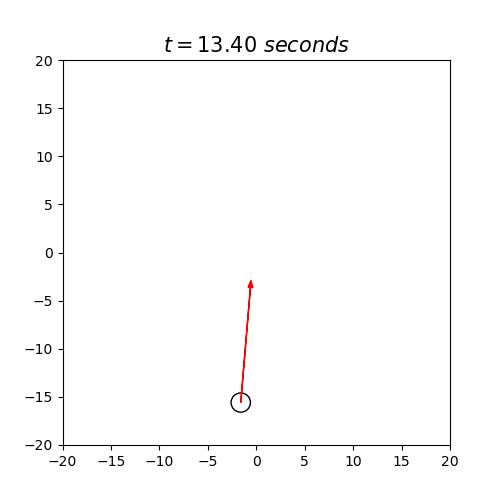

In [9]:
redt = ReduceTime(t,10)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
        vx = p.GetRVelocityVector()[i,0]
        vy = p.GetRVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False )
        plot = ax.add_patch(circle)
        plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
    plt.xlabel("x[m]")
    plt.ylabel("y[m]")    
    return plot
Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

>¿Qué tiempo tarda la pelota en dejar de rebotar? Haga su mejor estimación.
Respuesta: 

Para solucionar esta pregunta podemos llegar a una estimación teórica del tiempo de frenado que se obtiene a partir de las formulas de cinemática. Esta estimación se presenta en la siguiente celda, donde se ingresan los valores iniciales dados por el ejercicio y usados para la anterior simulación. 

In [11]:
#Estimación Teoríca del tiempo de frenado
c_r = 0.9
h = 25
g = 9.81

t_frenado = (1+c_r)/(1-c_r)*(np.sqrt(2*h/g))
t_frenado

42.89474589364444

Para hacer una estimación analitica, nuestra estrategia es usar la gráfica de Energía Mecánica vs Tiempo solicitada en el iteral (b) "Dibuje la energía mecánica de la pelota como una función del tiempo." e implementar una condición que nos permita conocer en tiempo la energía mecánica llega a su tope mínimo. Y luego comparar estos dos valores de Tiempo de Frenado.

49.82 -185.58063815192196


<IPython.core.display.Javascript object>


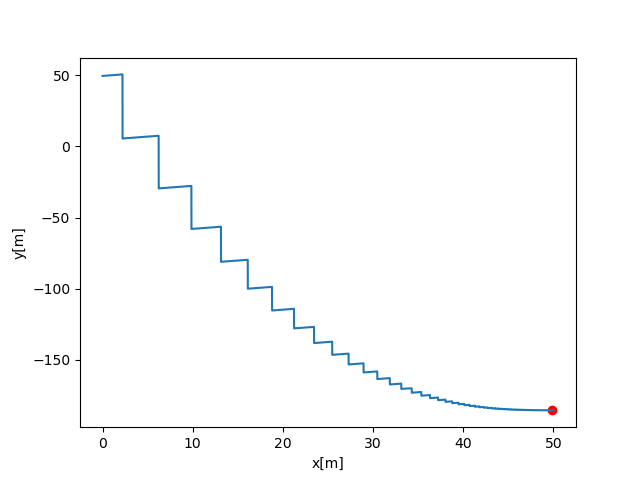

In [10]:
def MEnergy(p, t):
    vVector = p.GetVelocityVector() #Obtiene el vector velocidad
    hVector = p.GetPositionVector() #Obtiene el vector posicion

    KEnergy = [] #Se crea el contenedor de energía cinética
    PEnergy = [] #Se crea el contenedor de energía mecánica

    for i in vVector:
        e_k = 1/2 * 1 * ((i[0]**2) + (i[1]**2 ))
        KEnergy.append(e_k)

    for k in hVector:
        e_p = 1*9.81*(k[1])
        PEnergy.append(e_p)

    Mech_Energy = np.array(PEnergy) + np.array(KEnergy)

    posicion = 0
    for i in range(len(Mech_Energy)):
        if Mech_Energy[i] == np.min(Mech_Energy):
            posicion = i
            break
  
    x = t[posicion]
    print(x , np.min(Mech_Energy))

    fig = plt.figure()
    plt.xlabel('Time[s]')
    plt.ylabel('Mech_Energy[J]')
    plt.scatter(x , np.min(Mech_Energy), c='r')
    
    return plt.plot(t, Mech_Energy)
MEnergy(Particles[0], t)